<h3>Group 13
<H3>SECTION 01
<H3>PROGRAMMING FOR BIOINFORMATICS PROJECT

<H2>LIM WEI HSIEN A19EC0074
<H2>CHEE WAI LUM  A19EC0032



In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import InputLayer, Flatten, BatchNormalization
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.utils import np_utils
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Setting the image dimension
IMG_WIDTH=224
IMG_HEIGHT=224

#Create a funtion that will create image data from the images in the folder
def create_dataset(img_folder):
    img_data_array = []
    class_name = []
    
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder,dir1)):
            
            image_path = os.path.join(img_folder,dir1,file)
            image = cv2.imread(image_path,cv2.COLOR_BAYER_BG2RGB)
            image = cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

# extract the image array and class name
train_data, class_name = create_dataset(r'D:\SEMESTER 5\Programming Bioinfo\Project\breast')
training_data = np.asarray(train_data)
#class_name = np.asarray(class_name)

X_test, test_class_name = create_dataset(r'D:\SEMESTER 5\Programming Bioinfo\Project\breast_test')
X_test = np.asarray(X_test)

In [3]:
#Create a dictionary for all unique values for the classes
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}

target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

test_target_dic = {k: v for v, k in enumerate(np.unique(test_class_name))}

y_test = [target_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [4]:
X_train,X_valid,y_train,y_valid=train_test_split(training_data,target_val,test_size=0.3,random_state=2)

In [5]:
X_train.reshape(-1, 224, 224, 1)
X_valid.reshape(-1, 224, 224, 1)
X_test.reshape(-1, 224, 224, 1)

array([[[[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.09019608],
         [0.09019608],
         [0.09019608]],

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.09019608],
         [0.09019608],
         [0.09019608]],

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.09019608],
         [0.09019608],
         [0.09019608]],

        ...,

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.36862746],
         [0.38039216],
         [0.38039216]],

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.33333334],
         [0.34117648],
         [0.34117648]],

        [[0.09019608],
         [0.09019608],
         [0.09019608],
         ...,
         [0.33333334],
         [0.34117648],
         [0.34117648]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [6]:
#Convert Label for categorical_crossentropy loss
y_train_one_hot = np_utils.to_categorical(y_train)
y_valid_one_hot = np_utils.to_categorical(y_valid)
y_test_one_hot = np_utils.to_categorical(y_test)

In [7]:
print ("train data shape:")
print (X_train.shape)
print ("valid data shape:")
print (X_valid.shape)
print ("test data shape:")
print (X_test.shape)
print ("train label shape:")
print (y_train)
print ("valid label shape:")
print (y_valid)
print ("test label shape:")
print (y_test)
print('Original label:', y_train[1])
print('After conversion to one-hot:', y_train_one_hot[1])

train data shape:
(102, 224, 224)
valid data shape:
(44, 224, 224)
test data shape:
(68, 224, 224)
train label shape:
[0, 1, 1, 4, 1, 5, 3, 5, 3, 0, 1, 3, 3, 5, 3, 0, 3, 4, 1, 3, 1, 2, 1, 4, 3, 4, 1, 3, 3, 3, 4, 0, 2, 1, 6, 5, 0, 3, 1, 1, 0, 4, 3, 1, 1, 6, 4, 3, 5, 3, 3, 6, 1, 3, 7, 4, 0, 4, 1, 1, 3, 5, 3, 5, 1, 3, 2, 3, 3, 5, 3, 6, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 4, 0, 3, 1, 4, 4, 1, 3, 1, 6, 3, 0, 3, 3, 1, 1, 3, 0]
valid label shape:
[3, 4, 0, 1, 4, 3, 5, 0, 1, 4, 0, 2, 3, 4, 1, 3, 1, 3, 1, 3, 3, 4, 1, 0, 4, 3, 7, 1, 1, 2, 0, 3, 5, 4, 1, 3, 6, 3, 6, 4, 0, 3, 1, 3]
test label shape:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7]
Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
batch_size = 16
epochs = 30
num_classes = 8

In [9]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 128)               51380352  
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                        

In [11]:
hist=model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid_one_hot),verbose=1)

Epoch 1/30
7/7 [==============================] - 20s 3s/step - loss: 18.8000 - accuracy: 0.2157 - val_loss: 8.7870 - val_accuracy: 0.1364
Epoch 2/30
7/7 [==============================] - 17s 2s/step - loss: 3.6677 - accuracy: 0.1961 - val_loss: 1.9189 - val_accuracy: 0.2500
Epoch 3/30
7/7 [==============================] - 18s 3s/step - loss: 1.5842 - accuracy: 0.5588 - val_loss: 3.4087 - val_accuracy: 0.1591
Epoch 4/30
7/7 [==============================] - 17s 2s/step - loss: 1.1046 - accuracy: 0.6667 - val_loss: 2.1135 - val_accuracy: 0.4318
Epoch 5/30
7/7 [==============================] - 18s 3s/step - loss: 0.3425 - accuracy: 0.8824 - val_loss: 2.0533 - val_accuracy: 0.5227
Epoch 6/30
7/7 [==============================] - 18s 3s/step - loss: 0.0555 - accuracy: 0.9902 - val_loss: 2.2044 - val_accuracy: 0.5455
Epoch 7/30
7/7 [==============================] - 18s 3s/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 2.5435 - val_accuracy: 0.5909
Epoch 8/30
7/7 [=================

In [12]:
_, acc = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [13]:
print('> %.3f' % (acc * 100.0))

> 45.588


<h3>Implement cross validation

In [14]:
from sklearn.model_selection import KFold
kf = KFold()

In [15]:
# Define per-fold score containers 
acc_per_fold = []
loss_per_fold = []

In [16]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_one_hot, y_test_one_hot), axis=0)

In [17]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kf.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(num_classes, activation='softmax'))
  # compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  hist = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,validation_data=(X_valid, y_valid_one_hot),
              verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
9/9 [==============================] - 21s 2s/step - loss: 14.0844 - accuracy: 0.1985 - val_loss: 2.5422 - val_accuracy: 0.2045
Epoch 2/30
9/9 [==============================] - 21s 2s/step - loss: 2.0884 - accuracy: 0.3456 - val_loss: 1.9150 - val_accuracy: 0.1818
Epoch 3/30
9/9 [==============================] - 20s 2s/step - loss: 1.5503 - accuracy: 0.4853 - val_loss: 1.8308 - val_accuracy: 0.2955
Epoch 4/30
9/9 [==============================] - 20s 2s/step - loss: 0.9848 - accuracy: 0.7206 - val_loss: 2.7687 - val_accuracy: 0.3636
Epoch 5/30
9/9 [==============================] - 20s 2s/step - loss: 0.4901 - accuracy: 0.9118 - val_loss: 1.5814 - val_accuracy: 0.4773
Epoch 6/30
9/9 [==============================] - 20s 2s/step - loss: 0.0781 - accuracy: 0.9853 - val_loss: 1.5906 - val_accuracy: 0.5682
Epoch 7/30
9/9 [==============================] - 20s 2s/step - loss: 0.00

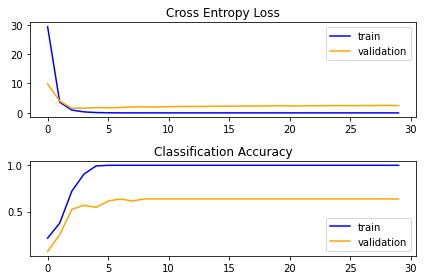

In [18]:
ax1 = plt.subplot(211)
plt.title('Cross Entropy Loss')
ax1.plot(hist.history['loss'], color='blue', label='train')
ax1.plot(hist.history['val_loss'], color='orange', label='validation')
ax1.legend()
    # plot accuracy
ax2 = plt.subplot(212)
plt.title('Classification Accuracy')
ax2.plot(hist.history['accuracy'], color='blue', label='train')
ax2.plot(hist.history['val_accuracy'], color='orange', label='validation')
ax2.legend()
plt.tight_layout()

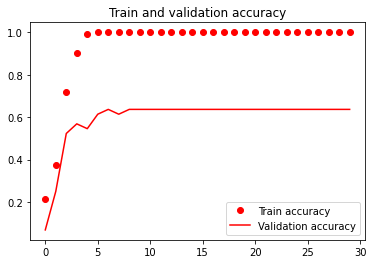

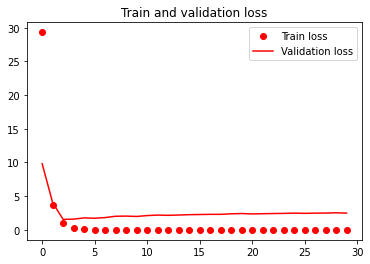

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation loss')
plt.legend()
plt.show()

In [20]:
model = define_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 401408)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               51380352  
                                                                 
 dense_13 (Dense)            (None, 8)                 1032      
                                                      

<h3>ROC AUC

In [40]:
from scipy import interp
from itertools import cycle
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.metrics import roc_curve, auc

In [41]:
pred_mul = model.predict(X_test, batch_size = 32, verbose = 0)
#pred_mul1 = np.argmax(pred_mul, axis=1)

In [42]:
pred_mul

array([[0.107 , 0.1966, 0.1498, 0.1429, 0.0868, 0.113 , 0.1091, 0.0948],
       [0.1033, 0.1676, 0.1373, 0.1419, 0.1094, 0.1246, 0.1195, 0.0965],
       [0.1018, 0.1412, 0.1344, 0.1633, 0.1113, 0.1294, 0.1135, 0.1049],
       [0.1122, 0.169 , 0.1597, 0.1067, 0.1018, 0.1257, 0.1029, 0.1221],
       [0.1038, 0.1741, 0.1426, 0.1027, 0.1082, 0.1389, 0.1054, 0.1242],
       [0.0984, 0.2041, 0.1373, 0.1534, 0.0852, 0.1073, 0.1178, 0.0966],
       [0.0968, 0.1907, 0.1242, 0.1504, 0.0969, 0.1184, 0.1255, 0.0971],
       [0.109 , 0.193 , 0.1532, 0.1328, 0.0904, 0.1049, 0.1133, 0.1035],
       [0.1066, 0.1798, 0.1337, 0.1386, 0.1044, 0.118 , 0.1202, 0.0988],
       [0.0963, 0.1622, 0.1395, 0.1529, 0.0874, 0.1487, 0.1082, 0.1048],
       [0.1034, 0.1493, 0.1284, 0.1439, 0.1077, 0.1416, 0.1229, 0.1028],
       [0.1136, 0.1741, 0.1451, 0.1516, 0.0936, 0.1152, 0.0865, 0.1203],
       [0.1092, 0.1603, 0.1505, 0.1234, 0.1187, 0.1057, 0.1065, 0.1255],
       [0.1358, 0.1609, 0.1471, 0.1367, 0.1081, 0.1

In [28]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_one_hot.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(y_test_one_hot[:,i], pred_mul[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), pred_mul.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [29]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

C:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


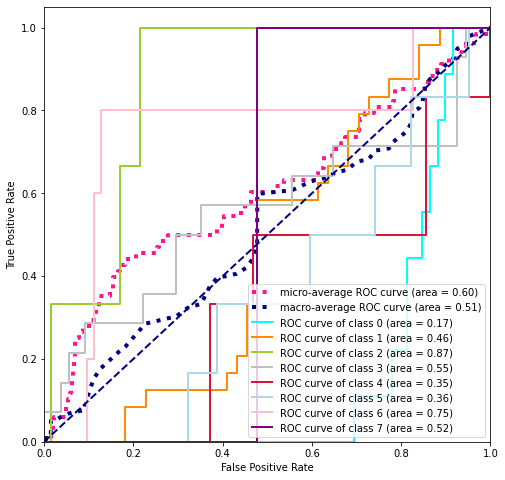

In [43]:
# Plot all ROC curves
plt.figure(figsize = [8, 8])
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson', 'lightblue', 'pink', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

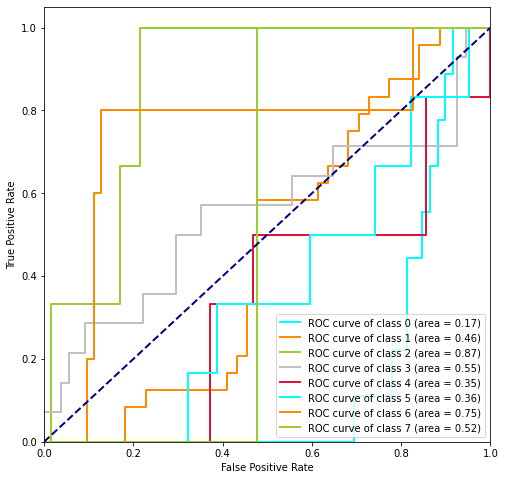

In [48]:
plt.figure(figsize = [8, 8])
lw = 2
colors = cycle(['aqua', 'darkorange', 'yellowgreen', 'silver', 'crimson'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<h3> Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y1, pred_1)
from sklearn.metrics import auc
#auc_keras = auc(fpr_keras, tpr_keras)

In [44]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred_mul

print("Numpy array of predictions")
display(pred_mul[0:5])

print("As percent probability")
print(pred_mul[0]*100)

score = metrics.log_loss(y_test, pred_mul)
print("Log loss score: {}".format(score))

pred = np.argmax(pred_mul,axis=1)

Numpy array of predictions


array([[0.107 , 0.1966, 0.1498, 0.1429, 0.0868, 0.113 , 0.1091, 0.0948],
       [0.1033, 0.1676, 0.1373, 0.1419, 0.1094, 0.1246, 0.1195, 0.0965],
       [0.1018, 0.1412, 0.1344, 0.1633, 0.1113, 0.1294, 0.1135, 0.1049],
       [0.1122, 0.169 , 0.1597, 0.1067, 0.1018, 0.1257, 0.1029, 0.1221],
       [0.1038, 0.1741, 0.1426, 0.1027, 0.1082, 0.1389, 0.1054, 0.1242]],
      dtype=float32)

As percent probability
[10.699  19.6647 14.9757 14.2906  8.6834 11.3015 10.9095  9.4756]
Log loss score: 2.03851760485593


In [45]:
instances = pd.Index(['0','1','2','3','4','5','6','7'])

In [46]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  8  0  1  0  0  0  0]
 [ 2 16  5  1  0  0  0  0]
 [ 0  1  2  0  0  0  0  0]
 [ 4  6  0  4  0  0  0  0]
 [ 0  5  1  0  0  0  0  0]
 [ 2  2  2  0  0  0  0  0]
 [ 0  1  3  0  1  0  0  0]
 [ 0  1  0  0  0  0  0  0]]
Normalized confusion matrix
[[0.   0.89 0.   0.11 0.   0.   0.   0.  ]
 [0.08 0.67 0.21 0.04 0.   0.   0.   0.  ]
 [0.   0.33 0.67 0.   0.   0.   0.   0.  ]
 [0.29 0.43 0.   0.29 0.   0.   0.   0.  ]
 [0.   0.83 0.17 0.   0.   0.   0.   0.  ]
 [0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.2  0.6  0.   0.2  0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]]


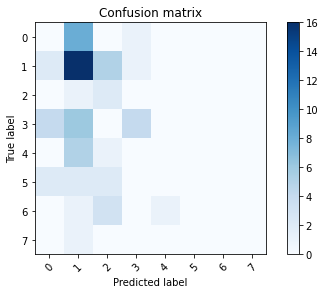

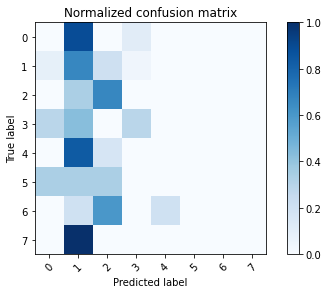

In [47]:
# Compute confusion matrix
y_compare = np.argmax(y_test_one_hot, axis =1)
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, instances)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, instances, title='Normalized confusion matrix')
plt.show()